# 🧠 Introduction

Welcome to the second notebook in Team Quail’s submission for the **FLIQ Hackathon**.

Our project, **Quail** – *Quantum Understanding and AI for Interpretability and Learning* – explores how hybrid quantum-classical models and interpretable machine learning can tackle challenging problems in drug discovery.

In this notebook, we focus on preparing the training and test data for modeling. We're not removing any features or addressing label imbalance at this stage — the goal is to **standardize and normalize** the descriptors so that they’re clean, consistent, and ready to be used in both classical and quantum pipelines.

Specifically, we will:
- Normalize numerical descriptors to ensure consistent scale across features  
- Apply transformations uniformly to both train and test sets  
- Ensure feature alignment and format consistency  
- Structure the datasets to be directly usable by classical and quantum machine learning models  

This ensures that all downstream experiments are reproducible and built on a well-defined input structure.

## Data Loading

In [32]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# show all columns
pd.set_option('display.max_columns', None)  

In [5]:
# import the training file
df_train = pd.read_csv("drug+induced+autoimmunity+prediction/DIA_trainingset_RDKit_descriptors.csv")
df_train.head()

,Label,SMILES,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3n,Chi3v,Chi4n,Chi4v,EState_VSA1,EState_VSA10,EState_VSA11,EState_VSA2,EState_VSA3,EState_VSA4,EState_VSA5,EState_VSA6,EState_VSA7,EState_VSA8,EState_VSA9,ExactMolWt,FractionCSP3,HallKierAlpha,HeavyAtomCount,HeavyAtomMolWt,Ipc,Kappa1,Kappa2,Kappa3,LabuteASA,MaxAbsEStateIndex,MaxAbsPartialCharge,MaxEStateIndex,MaxPartialCharge,MinAbsEStateIndex,MinAbsPartialCharge,MinEStateIndex,MinPartialCharge,MolLogP,MolMR,MolWt,NHOHCount,NOCount,NumAliphaticCarbocycles,NumAliphaticHeterocycles,NumAliphaticRings,NumAromaticCarbocycles,NumAromaticHeterocycles,NumAromaticRings,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRadicalElectrons,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,NumValenceElectrons,PEOE_VSA1,PEOE_VSA10,PEOE_VSA11,PEOE_VSA12,PEOE_VSA13,PEOE_VSA14,PEOE_VSA2,PEOE_VSA3,PEOE_VSA4,PEOE_VSA5,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,PEOE_VSA9,RingCount,SMR_VSA1,SMR_VSA10,SMR_VSA2,SMR_VSA3,SMR_VSA4,SMR_VSA5,SMR_VSA6,SMR_VSA7,SMR_VSA8,SMR_VSA9,SlogP_VSA1,SlogP_VSA10,SlogP_VSA11,SlogP_VSA12,SlogP_VSA2,SlogP_VSA3,SlogP_VSA4,SlogP_VSA5,SlogP_VSA6,SlogP_VSA7,SlogP_VSA8,SlogP_VSA9,TPSA,VSA_EState1,VSA_EState10,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,VSA_EState8,VSA_EState9,fr_Al_COO,fr_Al_OH,fr_Al_OH_noTert,fr_ArN,fr_Ar_COO,fr_Ar_N,fr_Ar_NH,fr_Ar_OH,fr_COO,fr_COO2,fr_C_O,fr_C_O_noCOO,fr_C_S,fr_HOCCN,fr_Imine,fr_NH0,fr_NH1,fr_NH2,fr_N_O,fr_Ndealkylation1,fr_Ndealkylation2,fr_Nhpyrrole,fr_SH,fr_aldehyde,fr_alkyl_carbamate,fr_alkyl_halide,fr_allylic_oxid,fr_amide,fr_amidine,fr_aniline,fr_aryl_methyl,fr_azide,fr_azo,fr_barbitur,fr_benzene,fr_benzodiazepine,fr_bicyclic,fr_diazo,fr_dihydropyridine,fr_epoxide,fr_ester,fr_ether,fr_furan,fr_guanido,fr_halogen,fr_hdrzine,fr_hdrzone,fr_imidazole,fr_imide,fr_isocyan,fr_isothiocyan,fr_ketone,fr_ketone_Topliss,fr_lactam,fr_lactone,fr_methoxy,fr_morpholine,fr_nitrile,fr_nitro,fr_nitro_arom,fr_nitro_arom_nonortho,fr_nitroso,fr_oxazole,fr_oxime,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_phos_acid,fr_phos_ester,fr_piperdine,fr_piperzine,fr_priamide,fr_prisulfonamd,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,COC(=O)N(C)c1c(N)nc(nc1N)c2nn(Cc3ccccc3F)c4ncc...,1.821,1266.407,22.121,16.781,16.781,14.901,9.203,9.203,6.668,6.668,4.719,4.719,3.241,3.241,6.093,9.185,0.0,35.509,22.291,4.900,20.224,41.210,0.000,24.787,11.467,422.162,0.150,-4.28,31,403.272,1.218475e+07,20.012,7.859,3.564,175.833,14.164,0.452,14.164,0.413,0.018,0.413,-0.668,-0.452,2.443,113.689,422.424,4,10,0,0,0,1,3,4,9,2,11,0,6,0,0,0,158,16.204,17.199,23.107,0.0,0.000,6.093,4.900,28.819,5.099,0.000,18.199,18.199,18.808,19.041,4,13.922,34.450,0.000,24.732,0.000,6.545,30.525,53.976,0,11.518,16.367,26.508,0.0,0.000,44.983,11.282,5.817,5.563,42.595,0.0,22.552,0,138.07,0,0.000,0,0,0,0,0,0,15.727,62.940,0,0,0,2,0,5,0,0,0,0,1,1,0,0,0,6,0,2,0,0,0,0,0,0,0,0,0,1,0,3,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,C[C@H](N(O)C(=O)N)c1cc2ccccc2s1,2.363,490.434,11.707,8.752,9.569,7.592,4.854,5.670,3.545,4.661,2.449,3.735,1.520,2.621,12.073,10.002,0.0,0.000,5.063,14.963,0.000,18.261,30.332,0.000,5.734,236.062,0.182,-1.59,16,224.200,5.774616e+03,10.912,4.112,1.868,96.858,10.832,0.350,10.832,0.339,0.421,0.339,-0.843,-0.350,2.732,63.449,236.296,3,4,0,0,0,1,1,2,3,2,5,0,3,0,0,0,84,5.734,0.000,0.000,0.0,0.000,6.031,5.207,4.795,5.063,11.337,18.199,24.443,9.577,6.042,2,10.002,27.454,0.000,5.063,5.734,12.966,0.000,35.209,0,0.000,5.734,4.795,0.0,11.337,16.302,0.000,0.000,17.843,30.332,0.0,10.086,0,66.56,0,1.542,0,0,0,0,0,0,0.000,39.292,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
2,0,C[N+](C)(C)CC(=O)[O-],3.551,93.092,6.784,5.47

In [6]:
# import the test file
df_test = pd.read_csv("drug+induced+autoimmunity+prediction/DIA_testset_RDKit_descriptors.csv")
df_test.head()

,Label,SMILES,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3n,Chi3v,Chi4n,Chi4v,EState_VSA1,EState_VSA10,EState_VSA11,EState_VSA2,EState_VSA3,EState_VSA4,EState_VSA5,EState_VSA6,EState_VSA7,EState_VSA8,EState_VSA9,ExactMolWt,FractionCSP3,HallKierAlpha,HeavyAtomCount,HeavyAtomMolWt,Ipc,Kappa1,Kappa2,Kappa3,LabuteASA,MaxAbsEStateIndex,MaxAbsPartialCharge,MaxEStateIndex,MaxPartialCharge,MinAbsEStateIndex,MinAbsPartialCharge,MinEStateIndex,MinPartialCharge,MolLogP,MolMR,MolWt,NHOHCount,NOCount,NumAliphaticCarbocycles,NumAliphaticHeterocycles,NumAliphaticRings,NumAromaticCarbocycles,NumAromaticHeterocycles,NumAromaticRings,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRadicalElectrons,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,NumValenceElectrons,PEOE_VSA1,PEOE_VSA10,PEOE_VSA11,PEOE_VSA12,PEOE_VSA13,PEOE_VSA14,PEOE_VSA2,PEOE_VSA3,PEOE_VSA4,PEOE_VSA5,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,PEOE_VSA9,RingCount,SMR_VSA1,SMR_VSA10,SMR_VSA2,SMR_VSA3,SMR_VSA4,SMR_VSA5,SMR_VSA6,SMR_VSA7,SMR_VSA8,SMR_VSA9,SlogP_VSA1,SlogP_VSA10,SlogP_VSA11,SlogP_VSA12,SlogP_VSA2,SlogP_VSA3,SlogP_VSA4,SlogP_VSA5,SlogP_VSA6,SlogP_VSA7,SlogP_VSA8,SlogP_VSA9,TPSA,VSA_EState1,VSA_EState10,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,VSA_EState8,VSA_EState9,fr_Al_COO,fr_Al_OH,fr_Al_OH_noTert,fr_ArN,fr_Ar_COO,fr_Ar_N,fr_Ar_NH,fr_Ar_OH,fr_COO,fr_COO2,fr_C_O,fr_C_O_noCOO,fr_C_S,fr_HOCCN,fr_Imine,fr_NH0,fr_NH1,fr_NH2,fr_N_O,fr_Ndealkylation1,fr_Ndealkylation2,fr_Nhpyrrole,fr_SH,fr_aldehyde,fr_alkyl_carbamate,fr_alkyl_halide,fr_allylic_oxid,fr_amide,fr_amidine,fr_aniline,fr_aryl_methyl,fr_azide,fr_azo,fr_barbitur,fr_benzene,fr_benzodiazepine,fr_bicyclic,fr_diazo,fr_dihydropyridine,fr_epoxide,fr_ester,fr_ether,fr_furan,fr_guanido,fr_halogen,fr_hdrzine,fr_hdrzone,fr_imidazole,fr_imide,fr_isocyan,fr_isothiocyan,fr_ketone,fr_ketone_Topliss,fr_lactam,fr_lactone,fr_methoxy,fr_morpholine,fr_nitrile,fr_nitro,fr_nitro_arom,fr_nitro_arom_nonortho,fr_nitroso,fr_oxazole,fr_oxime,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_phos_acid,fr_phos_ester,fr_piperdine,fr_piperzine,fr_priamide,fr_prisulfonamd,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,C[C@H](\C=C\[C@H](O)C1CC1)[C@@H]2CC[C@@H]3\C(=...,1.484,743.207,21.466,18.764,18.764,14.292,12.106,12.106,10.736,10.736,8.532,8.532,6.626,6.626,12.208,15.320,0.0,6.104,41.928,17.567,44.098,0.000,0.000,44.730,0.000,412.298,0.704,-1.16,30,372.294,8.390163e+06,22.049,8.763,4.397,181.829,10.227,0.393,10.227,0.081,0.250,0.081,-0.621,-0.393,5.091,121.760,412.614,3,3,4,0,4,0,0,0,3,3,3,0,5,4,0,4,166,15.320,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,50.304,91.599,6.421,18.312,4,15.320,0.000,0.0,0.000,29.087,89.947,0.000,47.602,0,0.000,0.000,0.000,0.000,0.000,33.631,0.000,29.087,71.635,47.602,0.0,0.0,0,60.69,0,0.000,0,0,0,0,0,0,0.000,62.083,0,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,OCCN1CCN(CCCN2c3ccccc3Sc4ccc(cc24)C(F)(F)F)CC1,1.472,868.947,21.140,16.736,17.553,14.453,10.268,11.084,7.662,8.746,5.690,6.820,4.077,5.153,11.740,13.171,0.0,6.607,18.777,54.623,23.895,6.066,29.165,9.800,5.107,437.175,0.455,-1.74,30,411.323,6.669991e+06,21.490,9.177,4.771,178.820,13.311,0.416,13.311,0.416,0.186,0.395,-4.351,-0.395,4.308,113.598,437.531,1,4,0,2,2,2,0,2,5,1,8,0,7,0,1,1,162,14.906,0.000,0.000,0.000,0.0,6.176,4.900,0.000,13.171,0.000,23.895,43.297,49.060,23.545,4,18.278,23.137,0.0,9.800,0.000,22.388,57.320,48.028,0,0.000,4.900,24.546,0.000,11.762,67.327,6.176,0.000,11.984,52.256,0.0,0.0,0,29.95,0,1.527,0,0,0,0,0,0,39.932,33.458,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,3,0,0,0,0,0,0,0,0,0,3,0,0,0,2,0,0,0,0,2,0,2,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,C[C@@H]1O[C@H](C[C@H](O)[C@@H

### Sanity Check
We should take a quick look at the types of data each column has to build intuition.

In [13]:
# check the datatypes
df_train.dtypes

Label                 int64
SMILES               object
BalabanJ            float64
BertzCT             float64
Chi0                float64
                     ...   
fr_thiazole           int64
fr_thiocyan           int64
fr_thiophene          int64
fr_unbrch_alkane      int64
fr_urea               int64
Length: 198, dtype: object

### Observation
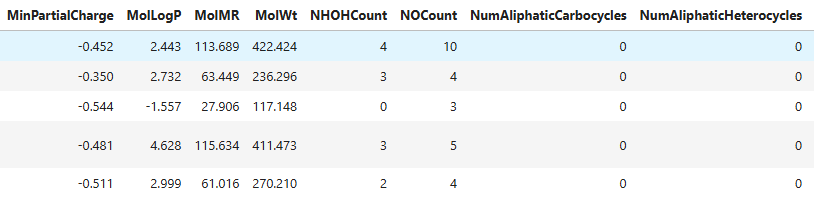
The mix of data types implies that we have to be careful when normalizing continuous data and discrete ones. 

In [20]:
# get columns which are ints
int_list = list(df_train.dtypes[df_train.dtypes == "int64"][1:].index)
int_list

['HeavyAtomCount',
 'NHOHCount',
 'NOCount',
 'NumAliphaticCarbocycles',
 'NumAliphaticHeterocycles',
 'NumAliphaticRings',
 'NumAromaticCarbocycles',
 'NumAromaticHeterocycles',
 'NumAromaticRings',
 'NumHAcceptors',
 'NumHDonors',
 'NumHeteroatoms',
 'NumRadicalElectrons',
 'NumRotatableBonds',
 'NumSaturatedCarbocycles',
 'NumSaturatedHeterocycles',
 'NumSaturatedRings',
 'NumValenceElectrons',
 'RingCount',
 'SMR_VSA8',
 'SlogP_VSA9',
 'VSA_EState1',
 'VSA_EState2',
 'VSA_EState3',
 'VSA_EState4',
 'VSA_EState5',
 'VSA_EState6',
 'VSA_EState7',
 'fr_Al_COO',
 'fr_Al_OH',
 'fr_Al_OH_noTert',
 'fr_ArN',
 'fr_Ar_COO',
 'fr_Ar_N',
 'fr_Ar_NH',
 'fr_Ar_OH',
 'fr_COO',
 'fr_COO2',
 'fr_C_O',
 'fr_C_O_noCOO',
 'fr_C_S',
 'fr_HOCCN',
 'fr_Imine',
 'fr_NH0',
 'fr_NH1',
 'fr_NH2',
 'fr_N_O',
 'fr_Ndealkylation1',
 'fr_Ndealkylation2',
 'fr_Nhpyrrole',
 'fr_SH',
 'fr_aldehyde',
 'fr_alkyl_carbamate',
 'fr_alkyl_halide',
 'fr_allylic_oxid',
 'fr_amide',
 'fr_amidine',
 'fr_aniline',
 'fr_aryl_

In [23]:
# get columns which are floats
float_list = df_train.dtypes[df_train.dtypes == "float64"].index
float_list

Index(['BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n',
       'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v',
       'EState_VSA1', 'EState_VSA10', 'EState_VSA11', 'EState_VSA2',
       'EState_VSA3', 'EState_VSA4', 'EState_VSA5', 'EState_VSA6',
       'EState_VSA7', 'EState_VSA8', 'EState_VSA9', 'ExactMolWt',
       'FractionCSP3', 'HallKierAlpha', 'HeavyAtomMolWt', 'Ipc', 'Kappa1',
       'Kappa2', 'Kappa3', 'LabuteASA', 'MaxAbsEStateIndex',
       'MaxAbsPartialCharge', 'MaxEStateIndex', 'MaxPartialCharge',
       'MinAbsEStateIndex', 'MinAbsPartialCharge', 'MinEStateIndex',
       'MinPartialCharge', 'MolLogP', 'MolMR', 'MolWt', 'PEOE_VSA1',
       'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14',
       'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6',
       'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10',
       'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7',
       'SMR_VS

In [22]:
# check if they add up to 196
len(int_list) + len(float_list)

196

In [25]:
# Separate train and test into their continuous and discrete parts
df_train_cont = df_train[float_list]
df_train_cont

,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3n,Chi3v,Chi4n,Chi4v,EState_VSA1,EState_VSA10,EState_VSA11,EState_VSA2,EState_VSA3,EState_VSA4,EState_VSA5,EState_VSA6,EState_VSA7,EState_VSA8,EState_VSA9,ExactMolWt,FractionCSP3,HallKierAlpha,HeavyAtomMolWt,Ipc,Kappa1,Kappa2,Kappa3,LabuteASA,MaxAbsEStateIndex,MaxAbsPartialCharge,MaxEStateIndex,MaxPartialCharge,MinAbsEStateIndex,MinAbsPartialCharge,MinEStateIndex,MinPartialCharge,MolLogP,MolMR,MolWt,PEOE_VSA1,PEOE_VSA10,PEOE_VSA11,PEOE_VSA12,PEOE_VSA13,PEOE_VSA14,PEOE_VSA2,PEOE_VSA3,PEOE_VSA4,PEOE_VSA5,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,PEOE_VSA9,SMR_VSA1,SMR_VSA10,SMR_VSA2,SMR_VSA3,SMR_VSA4,SMR_VSA5,SMR_VSA6,SMR_VSA7,SMR_VSA9,SlogP_VSA1,SlogP_VSA10,SlogP_VSA11,SlogP_VSA12,SlogP_VSA2,SlogP_VSA3,SlogP_VSA4,SlogP_VSA5,SlogP_VSA6,SlogP_VSA7,SlogP_VSA8,TPSA,VSA_EState10,VSA_EState8,VSA_EState9
0,1.821,1266.407,22.121,16.781,16.781,14.901,9.203,9.203,6.668,6.668,4.719,4.719,3.241,3.241,6.093,9.185,0.0,35.509,22.291,4.900,20.224,41.210,0.000,24.787,11.467,422.162,0.150,-4.28,403.272,1.218475e+07,20.012,7.859,3.564,175.833,14.164,0.452,14.164,0.413,0.018,0.413,-0.668,-0.452,2.443,113.689,422.424,16.204,17.199,23.107,0.000,0.000,6.093,4.900,28.819,5.099,0.000,18.199,18.199,18.808,19.041,13.922,34.450,0.000,24.732,0.000,6.545,30.525,53.976,11.518,16.367,26.508,0.000,0.000,44.983,11.282,5.817,5.563,42.595,0.000,22.552,138.07,0.000,15.727,62.940
1,2.363,490.434,11.707,8.752,9.569,7.592,4.854,5.670,3.545,4.661,2.449,3.735,1.520,2.621,12.073,10.002,0.0,0.000,5.063,14.963,0.000,18.261,30.332,0.000,5.734,236.062,0.182,-1.59,224.200,5.774616e+03,10.912,4.112,1.868,96.858,10.832,0.350,10.832,0.339,0.421,0.339,-0.843,-0.350,2.732,63.449,236.296,5.734,0.000,0.000,0.000,0.000,6.031,5.207,4.795,5.063,11.337,18.199,24.443,9.577,6.042,10.002,27.454,0.000,5.063,5.734,12.966,0.000,35.209,0.000,5.734,4.795,0.000,11.337,16.302,0.000,0.000,17.843,30.332,0.000,10.086,66.56,1.542,0.000,39.292
2,3.551,93.092,6.784,5.471,5.471,3.417,2.420,2.420,2.820,2.820,0.603,0.603,0.387,0.387,5.969,9.901,0.0,6.545,4.483,0.000,0.000,21.143,0.000,0.000,0.000,117.079,0.800,-0.57,106.060,2.300500e+01,7.430,2.132,5.430,49.125,9.888,0.544,9.888,0.118,0.069,0.118,-1.002,-0.544,-1.557,27.906,117.148,14.384,6.545,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,27.112,14.384,5.969,0.000,0.000,0.000,0.000,27.688,0.000,0.000,5.107,0.000,0.000,0.000,38.140,4.795,0.000,0.000,0.000,0.000,0.000,40.13,0.000,0.419,24.248
3,2.076,1053.003,21.836,16.995,16.995,14.274,9.926,9.926,7.662,7.662,4.998,4.998,3.768,3.768,24.598,19.398,0.0,18.280,0.000,27.724,12.133,24.285,24.265,18.415,5.107,411.185,0.292,-2.96,385.265,4.553841e+06,21.742,9.238,4.777,174.259,13.498,0.481,13.498,0.305,0.073,0.305,-1.130,-0.481,4.628,115.634,411.473,19.887,5.817,0.000,0.000,0.000,5.969,4.795,4.390,0.000,0.000,36.408,43.686,34.623,18.629,24.505,22.948,0.000,4.567,0.000,44.939,0.000,66.118,11.127,0.000,4.390,0.000,0.000,38.064,4.795,5.817,38.425,54.607,0.000,28.106,82.69,0.000,15.642,62.025
4,2.888,549.823,14.629,9.746,9.746,8.752,5.040,5.040,3.601,3.601,2.171,2.171,1.232,1.232,28.979,17.966,0.0,5.687,0.000,31.189,6.069,0.000,0.000,5.317,10.368,270.062,0.167,-2.49,261.138,1.013411e+04,14.571,5.436,3.741,106.326,12.300,0.511,12.300,0.416,0.090,0.416,-4.456,-0.511,2.999,61.016,270.210,10.423,11.828,5.573,0.000,5.907,6.176,4.795,0.000,18.433,0.000,0.000,31.189,5.687,5.563,23.072,11.595,5.262,0.000,0.000,13.100,5.317,41.161,6.069,5.317,18.859,0.000,0.000,11.014,10.971,11.331,12.487,35.598,0.000,0.000,73.12,0.000,36.900,30.684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,2.022,537.932,10.795,9.110,9.110,7.933,5.672,5.672,4.070,4.070,2.981,2.981,2.192,2.19

In [26]:
df_train_discrete = df_train[int_list]
df_train_discrete

,HeavyAtomCount,NHOHCount,NOCount,NumAliphaticCarbocycles,NumAliphaticHeterocycles,NumAliphaticRings,NumAromaticCarbocycles,NumAromaticHeterocycles,NumAromaticRings,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRadicalElectrons,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,NumValenceElectrons,RingCount,SMR_VSA8,SlogP_VSA9,VSA_EState1,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,fr_Al_COO,fr_Al_OH,fr_Al_OH_noTert,fr_ArN,fr_Ar_COO,fr_Ar_N,fr_Ar_NH,fr_Ar_OH,fr_COO,fr_COO2,fr_C_O,fr_C_O_noCOO,fr_C_S,fr_HOCCN,fr_Imine,fr_NH0,fr_NH1,fr_NH2,fr_N_O,fr_Ndealkylation1,fr_Ndealkylation2,fr_Nhpyrrole,fr_SH,fr_aldehyde,fr_alkyl_carbamate,fr_alkyl_halide,fr_allylic_oxid,fr_amide,fr_amidine,fr_aniline,fr_aryl_methyl,fr_azide,fr_azo,fr_barbitur,fr_benzene,fr_benzodiazepine,fr_bicyclic,fr_diazo,fr_dihydropyridine,fr_epoxide,fr_ester,fr_ether,fr_furan,fr_guanido,fr_halogen,fr_hdrzine,fr_hdrzone,fr_imidazole,fr_imide,fr_isocyan,fr_isothiocyan,fr_ketone,fr_ketone_Topliss,fr_lactam,fr_lactone,fr_methoxy,fr_morpholine,fr_nitrile,fr_nitro,fr_nitro_arom,fr_nitro_arom_nonortho,fr_nitroso,fr_oxazole,fr_oxime,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_phos_acid,fr_phos_ester,fr_piperdine,fr_piperzine,fr_priamide,fr_prisulfonamd,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,31,4,10,0,0,0,1,3,4,9,2,11,0,6,0,0,0,158,4,0,0,0,0,0,0,0,0,0,0,0,0,2,0,5,0,0,0,0,1,1,0,0,0,6,0,2,0,0,0,0,0,0,0,0,0,1,0,3,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,16,3,4,0,0,0,1,1,2,3,2,5,0,3,0,0,0,84,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
2,8,0,3,0,0,0,0,0,0,2,0,3,0,2,0,0,0,48,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,30,3,5,0,0,0,2,1,3,4,3,6,0,8,0,0,0,158,3,0,0,0,0,0,0,0,0,0,1,2,2,0,0,1,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19,2,4,0,0,0,1,0,1,3,2,7,0,4,0,0,0,100,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,3,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,16,1,2,0,1,1,2,0,2,2,1,2,0,2,0,0,0,80,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
473,26,2,5,3,2,5,1,0,1,4,2,5,0,2,2,1,3,138,6,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
474,29,4,12,0,2,2,0,1,1,9,3,13,0,9,0,1,1,154,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4,3,0,0,0,2,1,1,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
475,26,0,4,0,0,0,2,1,3,4,0,8,0,6,0,0,0,134,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
# do the same for test
df_test_cont = df_test[float_list]
df_test_discrete = df_test[int_list]

### Scale and simplify
Here, we will use scalers to scale the dataset and ensure that they're in a format that's friendly enough for machine learning later.

In [34]:
# Use StandardScaler for continuous values
standard_scaler = StandardScaler()

In [37]:
# fit_transform df_train_cont
df_train_cont_scaled = standard_scaler.fit_transform(df_train_cont.values)
df_train_cont_scaled

array([[-0.45287476,  1.34446538,  0.551264  , ..., -0.28323031,
         0.46629423,  0.39772629],
       [ 0.31032188, -0.63225659, -0.88719363, ...,  0.06627984,
        -0.48429991, -0.53802509],
       [ 1.98315882, -1.64444987, -1.56719429, ..., -0.28323031,
        -0.45897411, -1.13331618],
       ...,
       [-0.53032092,  0.43662932,  0.41424172, ..., -0.00829139,
        -0.17386235,  1.01284196],
       [-0.43879364,  0.47779548,  0.05359136, ...,  5.23980062,
        -0.37169376, -0.73235336],
       [-0.74012959,  2.10608515,  1.71484832, ..., -1.28982859,
         3.6141891 ,  0.01302674]])

In [39]:
# do the same for df_test_cont
df_test_cont_scaled = standard_scaler.transform(df_test_cont.values)
df_test_cont_scaled

array([[-0.92740847,  0.01166007,  0.46079062, ..., -0.28323031,
        -0.48429991,  0.3638148 ],
       [-0.94430582,  0.3319715 ,  0.41576112, ...,  0.06287993,
         1.92932793, -0.76887647],
       [-1.83845687,  1.70771851,  2.90882064, ..., -0.28323031,
        -0.48429991,  2.99521986],
       ...,
       [-0.66549966, -0.36973572, -0.38206212, ...,  0.1383578 ,
        -0.48429991, -0.49129292],
       [ 0.64826874,  0.41711616,  0.59284031, ..., -0.28323031,
        -0.48429991,  1.07279051],
       [ 0.94538035, -1.60188009, -1.05598518, ..., -0.28323031,
        -0.48429991, -1.12334454]])

In [42]:
# use MixMaxScaler for discrete values
minmax_scaler = MinMaxScaler()

In [46]:
# fit_transform df_train_discrete
df_train_discrete_scaled = minmax_scaler.fit_transform(df_train_discrete.values)
df_train_discrete_scaled

array([[0.42857143, 0.25      , 0.43478261, ..., 0.        , 0.        ,
        0.        ],
       [0.19047619, 0.1875    , 0.17391304, ..., 0.5       , 0.        ,
        1.        ],
       [0.06349206, 0.        , 0.13043478, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.3968254 , 0.25      , 0.52173913, ..., 0.        , 0.        ,
        0.        ],
       [0.34920635, 0.        , 0.17391304, ..., 0.        , 0.        ,
        0.        ],
       [0.6031746 , 0.        , 0.30434783, ..., 0.        , 0.        ,
        0.        ]])

In [47]:
# do the same for df_test_discrete
df_test_discrete_scaled = minmax_scaler.transform(df_test_discrete.values)
df_test_discrete_scaled

array([[0.41269841, 0.1875    , 0.13043478, ..., 0.        , 0.        ,
        0.        ],
       [0.41269841, 0.0625    , 0.17391304, ..., 0.        , 0.        ,
        0.        ],
       [0.80952381, 0.375     , 0.60869565, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.28571429, 0.0625    , 0.08695652, ..., 0.5       , 0.        ,
        0.        ],
       [0.41269841, 0.0625    , 0.39130435, ..., 0.        , 0.05555556,
        0.        ],
       [0.15873016, 0.0625    , 0.04347826, ..., 0.        , 0.5       ,
        0.        ]])

### Combine and reconstitute
Now that we've scaled these quantities separately, let's combine them again!

In [53]:
# convert the scaled arrays into DataFrames
df_train_cont_scaled_df = pd.DataFrame(df_train_cont_scaled)
df_train_cont_scaled_df.columns = df_train_cont.columns
df_train_cont_scaled_df

,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3n,Chi3v,Chi4n,Chi4v,EState_VSA1,EState_VSA10,EState_VSA11,EState_VSA2,EState_VSA3,EState_VSA4,EState_VSA5,EState_VSA6,EState_VSA7,EState_VSA8,EState_VSA9,ExactMolWt,FractionCSP3,HallKierAlpha,HeavyAtomMolWt,Ipc,Kappa1,Kappa2,Kappa3,LabuteASA,MaxAbsEStateIndex,MaxAbsPartialCharge,MaxEStateIndex,MaxPartialCharge,MinAbsEStateIndex,MinAbsPartialCharge,MinEStateIndex,MinPartialCharge,MolLogP,MolMR,MolWt,PEOE_VSA1,PEOE_VSA10,PEOE_VSA11,PEOE_VSA12,PEOE_VSA13,PEOE_VSA14,PEOE_VSA2,PEOE_VSA3,PEOE_VSA4,PEOE_VSA5,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,PEOE_VSA9,SMR_VSA1,SMR_VSA10,SMR_VSA2,SMR_VSA3,SMR_VSA4,SMR_VSA5,SMR_VSA6,SMR_VSA7,SMR_VSA9,SlogP_VSA1,SlogP_VSA10,SlogP_VSA11,SlogP_VSA12,SlogP_VSA2,SlogP_VSA3,SlogP_VSA4,SlogP_VSA5,SlogP_VSA6,SlogP_VSA7,SlogP_VSA8,TPSA,VSA_EState10,VSA_EState8,VSA_EState9
0,-0.452875,1.344465,0.551264,0.395663,0.309064,0.627503,0.204954,0.062833,-0.001312,-0.175467,-0.046856,-0.216005,-0.134956,-0.295263,-0.525136,-0.384981,-0.181361,1.395076,0.554831,-0.812459,0.507059,2.249669,-0.893830,0.593069,0.084085,0.435157,-1.274949,-2.173874,0.494435,-0.077296,0.224120,0.054235,-0.073153,0.460355,1.022116,0.090102,1.022116,1.398748,-0.410428,1.551494,0.396527,-0.140761,0.042382,0.514900,0.433896,0.012270,0.836808,2.541196,-0.547020,-0.461025,0.310042,-0.363430,4.605039,0.582421,-0.362256,-0.293023,-0.790225,0.005257,0.500367,-0.350813,1.067887,-0.190321,2.397158,-0.706031,-0.991136,1.069443,0.578333,1.199439,1.377778,3.798498,-0.496764,-0.536573,0.116134,-0.150281,-0.197533,-1.047197,0.565206,-0.322665,2.851332,0.972146,-0.283230,0.466294,0.397726
1,0.310322,-0.632257,-0.887194,-0.923257,-0.867786,-0.887752,-0.954128,-0.864476,-0.953691,-0.776947,-0.874703,-0.567973,-0.887579,-0.560062,-0.263887,-0.305248,-0.181361,-1.140124,-0.755872,-0.247407,-0.915263,0.516790,0.771000,-0.948309,-0.452991,-0.848802,-1.152678,0.324123,-0.825238,-0.077299,-0.936127,-0.884150,-0.090552,-0.870688,-0.235308,-0.957155,-0.235308,0.715441,0.315142,0.817511,0.283780,0.874895,0.156859,-0.809262,-0.849028,-0.875052,-0.898272,-0.599476,-0.547020,-0.461025,0.299272,-0.319031,0.145245,0.575623,1.532125,-0.293023,-0.541730,-0.626900,-0.622577,-0.618204,0.591976,-0.190321,-0.248317,-0.136601,-0.797708,-0.948979,-0.131601,-0.591507,-0.152654,0.184222,-0.496764,0.540251,-0.902692,-1.186703,-0.759979,-0.572578,-0.003722,-0.322665,0.995063,-0.339273,0.066280,-0.484300,-0.538025
2,1.983159,-1.644450,-1.567194,-1.462226,-1.536495,-1.753286,-1.602831,-1.717507,-1.174784,-1.328678,-1.547920,-1.688262,-1.383059,-1.514193,-0.530553,-0.315105,-0.181361,-0.672837,-0.799998,-1.087602,-0.915263,0.734410,-0.893830,-0.948309,-0.990161,-1.669700,1.208687,1.271318,-1.695872,-0.077299,-1.380081,-1.380014,-0.054011,-1.675180,-0.591554,1.034686,-0.591554,-1.325244,-0.318607,-1.374517,0.181342,-1.056843,-1.542071,-1.746059,-1.670280,-0.141973,-0.237995,-0.599476,-0.547020,-0.461025,-0.748403,-1.072078,-0.744894,-0.380377,-0.362256,-1.138449,-1.514497,-1.282752,1.197596,-0.319299,-0.869567,-0.190321,-0.929289,-0.706031,-1.188299,0.881851,-1.463516,-0.591507,-0.242899,-0.613938,-0.496764,-0.536573,-0.126947,-0.746210,-0.759979,-1.262206,-1.410942,-0.322665,-0.506809,-0.823971,-0.283230,-0.458974,-1.133316
3,-0.093806,0.800838,0.511898,0.430817,0.343985,0.497517,0.397646,0.252599,0.301815,0.122425,0.054892,-0.116209,0.095510,-0.070183,0.283293,0.611727,-0.181361,0.164995,-1.141063,0.469142,-0.061968,0.971662,0.438001,0.196827,-0.511729,0.359423,-0.732370,-0.948091,0.361732,-0.077298,0.444694,0.399587,-0.060710,0.433827,0.770782,0.387851,0.770782,0.401489,-0.311405,0.480276,0.098875,-0.429526,0.907890,0.566164,0.358414,0.324401,-0.311438,-0.599476,-0.547020,-0.461025,0.288501,-0.378616,0.070061,-0.380377,-0.362256,0.552867,0.224091,1.088299,0.464775,0.371076,0.285450,-0.190321,-0.315029,-0.706031,0.165452,-0.948979,1.037651,1.138642,-0.977961,0.116807,-0.496764,-0.536573,-0.129647,-0.746210,-0.197533,0.222912,

In [54]:
# do the same for other DataFrames
df_test_cont_scaled_df = pd.DataFrame(df_test_cont_scaled)
df_test_cont_scaled_df.columns = df_test_cont.columns
df_test_cont_scaled_df

,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3n,Chi3v,Chi4n,Chi4v,EState_VSA1,EState_VSA10,EState_VSA11,EState_VSA2,EState_VSA3,EState_VSA4,EState_VSA5,EState_VSA6,EState_VSA7,EState_VSA8,EState_VSA9,ExactMolWt,FractionCSP3,HallKierAlpha,HeavyAtomMolWt,Ipc,Kappa1,Kappa2,Kappa3,LabuteASA,MaxAbsEStateIndex,MaxAbsPartialCharge,MaxEStateIndex,MaxPartialCharge,MinAbsEStateIndex,MinAbsPartialCharge,MinEStateIndex,MinPartialCharge,MolLogP,MolMR,MolWt,PEOE_VSA1,PEOE_VSA10,PEOE_VSA11,PEOE_VSA12,PEOE_VSA13,PEOE_VSA14,PEOE_VSA2,PEOE_VSA3,PEOE_VSA4,PEOE_VSA5,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,PEOE_VSA9,SMR_VSA1,SMR_VSA10,SMR_VSA2,SMR_VSA3,SMR_VSA4,SMR_VSA5,SMR_VSA6,SMR_VSA7,SMR_VSA9,SlogP_VSA1,SlogP_VSA10,SlogP_VSA11,SlogP_VSA12,SlogP_VSA2,SlogP_VSA3,SlogP_VSA4,SlogP_VSA5,SlogP_VSA6,SlogP_VSA7,SlogP_VSA8,TPSA,VSA_EState10,VSA_EState8,VSA_EState9
0,-0.927408,0.011660,0.460791,0.721410,0.632649,0.501249,0.978653,0.824786,1.239251,1.043675,1.343707,1.147872,1.345362,1.150456,-0.257990,0.213746,-0.181361,-0.704323,2.048809,-0.101188,2.186080,-0.862098,-0.893830,1.833223,-0.990161,0.367102,0.841873,0.723430,0.266143,-0.077297,0.483836,0.280629,-0.064608,0.561412,-0.463622,-0.515664,-0.463622,-1.666898,0.007270,-1.741508,0.426808,0.446727,1.091291,0.727625,0.366279,-0.062648,-0.898272,-0.599476,-0.547020,-0.461025,-0.748403,-1.072078,-0.744894,-0.380377,-0.362256,1.198399,2.130903,-0.843029,0.437391,-0.255452,-1.275615,-0.190321,-0.929289,2.182529,1.521281,-0.948979,0.337212,-0.591507,-0.977961,-0.613938,-0.496764,-0.536573,-0.287119,-1.186703,2.052441,1.506471,0.797500,-0.322665,-0.506809,-0.446922,-0.283230,-0.484300,0.363815
1,-0.944306,0.331971,0.415761,0.388271,0.435039,0.534627,0.488795,0.556540,0.301815,0.447290,0.307258,0.535504,0.230641,0.521344,-0.278435,0.004021,-0.181361,-0.668410,0.287486,1.979562,0.765235,-0.404055,0.706947,-0.338897,-0.511729,0.538736,-0.109551,0.184829,0.553767,-0.077298,0.412564,0.384310,-0.060772,0.510698,0.700213,-0.279518,0.700213,1.426449,-0.107957,1.372958,-1.976310,0.426812,0.781134,0.512501,0.538024,-0.097734,-0.898272,-0.599476,-0.547020,-0.461025,0.324460,-0.363430,-0.744894,2.106583,-0.362256,-0.028418,0.208610,2.076973,0.889454,-0.053681,0.298307,-0.190321,0.388808,-0.706031,-0.513878,2.841224,0.353327,-0.591507,-0.272693,3.471910,-0.496764,0.580619,0.909853,-0.619344,-0.759979,-0.799027,1.013418,-0.322665,-0.506809,-1.010662,0.062880,1.929328,-0.768876
2,-1.838457,1.707719,2.908821,3.044182,2.940006,2.930757,3.333331,3.143715,3.703299,3.465178,4.049707,3.801941,4.028740,3.771113,3.180967,2.176713,-0.181361,3.222955,0.286193,1.388567,-0.915263,0.642288,-0.133811,-0.517740,2.116130,2.906952,1.693951,0.621282,2.802308,0.264547,2.837225,1.862886,-0.038419,2.946133,0.419820,0.151705,0.419820,0.641570,-0.361817,0.738162,0.174899,-0.200505,-0.046743,2.595025,2.905102,4.045733,1.615622,1.965309,-0.547020,-0.461025,0.288501,-1.072078,0.145245,-0.380377,-0.362256,-0.495193,2.735783,0.823274,3.557774,3.378344,-0.869567,-0.190321,-0.929289,2.720280,4.742008,-0.512100,-1.022848,-0.591507,-0.977961,-0.613938,-0.496764,-0.536573,3.307741,2.299853,2.576017,2.805607,-0.870499,-0.322665,-0.506809,2.163995,-0.283230,-0.484300,2.995220
3,0.370871,-0.298892,-0.594226,-0.669461,-0.748991,-0.576782,-0.689477,-0.818019,-0.748760,-0.910010,-0.731379,-0.887392,-0.722273,-0.868852,-0.533262,-0.345554,-0.181361,-0.268807,0.561449,-1.087602,-0.915263,2.344434,-0.560886,-0.948309,0.084085,-0.724311,-1.592091,-0.632359,-0.707495,-0.077299,-0.691965,-0.573859,-0.081032,-0.639317,0.322079,-0.464328,0.322079,-0.374156,-0.388823,-0.352893,0.520226,0.396940,-0.320061,-0.541003,-0.725008,-0.389186,-0.898272,0.186541,0.542057,-0.461025,-0.748403,0.314702,-0.744894,-0.380377,-0.362256,0.834242,-1.051654,-0.131296,-0.589837,-0.646376,-0.093456,-0.190321,-0.929289,-0.136601,-0.994871,-0.569826,1.003718,-0.591507,0.672510,0.332701,-0.496764,-0.536573,-1.066522,-0.156436,-0.759979,-0.431815,0.840600,-0.322665,-0.506809,0.020

In [55]:
df_train_discrete_scaled_df = pd.DataFrame(df_train_discrete_scaled)
df_train_discrete_scaled_df.columns = df_train_discrete.columns
df_train_discrete_scaled_df

,HeavyAtomCount,NHOHCount,NOCount,NumAliphaticCarbocycles,NumAliphaticHeterocycles,NumAliphaticRings,NumAromaticCarbocycles,NumAromaticHeterocycles,NumAromaticRings,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRadicalElectrons,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,NumValenceElectrons,RingCount,SMR_VSA8,SlogP_VSA9,VSA_EState1,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,fr_Al_COO,fr_Al_OH,fr_Al_OH_noTert,fr_ArN,fr_Ar_COO,fr_Ar_N,fr_Ar_NH,fr_Ar_OH,fr_COO,fr_COO2,fr_C_O,fr_C_O_noCOO,fr_C_S,fr_HOCCN,fr_Imine,fr_NH0,fr_NH1,fr_NH2,fr_N_O,fr_Ndealkylation1,fr_Ndealkylation2,fr_Nhpyrrole,fr_SH,fr_aldehyde,fr_alkyl_carbamate,fr_alkyl_halide,fr_allylic_oxid,fr_amide,fr_amidine,fr_aniline,fr_aryl_methyl,fr_azide,fr_azo,fr_barbitur,fr_benzene,fr_benzodiazepine,fr_bicyclic,fr_diazo,fr_dihydropyridine,fr_epoxide,fr_ester,fr_ether,fr_furan,fr_guanido,fr_halogen,fr_hdrzine,fr_hdrzone,fr_imidazole,fr_imide,fr_isocyan,fr_isothiocyan,fr_ketone,fr_ketone_Topliss,fr_lactam,fr_lactone,fr_methoxy,fr_morpholine,fr_nitrile,fr_nitro,fr_nitro_arom,fr_nitro_arom_nonortho,fr_nitroso,fr_oxazole,fr_oxime,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_phos_acid,fr_phos_ester,fr_piperdine,fr_piperzine,fr_priamide,fr_prisulfonamd,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0.428571,0.2500,0.434783,0.0,0.000000,0.000000,0.333333,0.75,0.8,0.473684,0.166667,0.416667,0.0,0.214286,0.0,0.0,0.000000,0.385057,0.444444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,1.0,0.0,0.833333,0.0,0.00,0.0,0.0,0.1,0.1,0.0,0.0,0.00,0.857143,0.000000,0.50,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000000,0.1,0.0,1.000000,0.0,0.0,0.0,0.0,0.333333,0.0,0.090909,0.0,0.0,0.0,0.00,0.1,0.0,0.0,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.190476,0.1875,0.173913,0.0,0.000000,0.000000,0.333333,0.25,0.4,0.157895,0.166667,0.166667,0.0,0.107143,0.0,0.0,0.000000,0.172414,0.222222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.1,0.1,0.0,0.0,0.00,0.142857,0.000000,0.25,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000000,0.2,0.0,0.000000,0.0,0.0,0.0,0.0,0.333333,0.0,0.090909,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,1.0
2,0.063492,0.0000,0.130435,0.0,0.000000,0.000000,0.000000,0.00,0.0,0.105263,0.000000,0.083333,0.0,0.071429,0.0,0.0,0.000000,0.068966,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.000,0.000,0.0,0.0,0.000000,0.0,0.00,0.2,0.2,0.1,0.1,0.0,0.0,0.00,0.142857,0.000000,0.00,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.412698,0.1875,0.217391,0.0,0.000000,0.000000,0.666667,0.25,0.6,0.210526,0.250000,0.208333,0.0,0.285714,0.0,0.0,0.000000,0.385057,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.250,0.250,0.0,0.0,0.166667,0.0,0.00,0.2,0.2,0.1,0.0,0.0,0.0,0.00,0.142857,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.666667,0.0,0.090909,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.000000,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.238095,0.1250,0.173913,0.0,0.000000,0.000000,0.333333,0.00,0.2,0.157895,0.166667,0.250000,0.0,0.142857,0.0,0.0,0.000000,0.218391,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [56]:
df_test_discrete_scaled_df = pd.DataFrame(df_test_discrete_scaled)
df_test_discrete_scaled_df.columns = df_test_discrete.columns
df_test_discrete_scaled_df

,HeavyAtomCount,NHOHCount,NOCount,NumAliphaticCarbocycles,NumAliphaticHeterocycles,NumAliphaticRings,NumAromaticCarbocycles,NumAromaticHeterocycles,NumAromaticRings,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRadicalElectrons,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,NumValenceElectrons,RingCount,SMR_VSA8,SlogP_VSA9,VSA_EState1,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,fr_Al_COO,fr_Al_OH,fr_Al_OH_noTert,fr_ArN,fr_Ar_COO,fr_Ar_N,fr_Ar_NH,fr_Ar_OH,fr_COO,fr_COO2,fr_C_O,fr_C_O_noCOO,fr_C_S,fr_HOCCN,fr_Imine,fr_NH0,fr_NH1,fr_NH2,fr_N_O,fr_Ndealkylation1,fr_Ndealkylation2,fr_Nhpyrrole,fr_SH,fr_aldehyde,fr_alkyl_carbamate,fr_alkyl_halide,fr_allylic_oxid,fr_amide,fr_amidine,fr_aniline,fr_aryl_methyl,fr_azide,fr_azo,fr_barbitur,fr_benzene,fr_benzodiazepine,fr_bicyclic,fr_diazo,fr_dihydropyridine,fr_epoxide,fr_ester,fr_ether,fr_furan,fr_guanido,fr_halogen,fr_hdrzine,fr_hdrzone,fr_imidazole,fr_imide,fr_isocyan,fr_isothiocyan,fr_ketone,fr_ketone_Topliss,fr_lactam,fr_lactone,fr_methoxy,fr_morpholine,fr_nitrile,fr_nitro,fr_nitro_arom,fr_nitro_arom_nonortho,fr_nitroso,fr_oxazole,fr_oxime,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_phos_acid,fr_phos_ester,fr_piperdine,fr_piperzine,fr_priamide,fr_prisulfonamd,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0.412698,0.1875,0.130435,0.8,0.000000,0.571429,0.000000,0.00,0.0,0.157895,0.250000,0.083333,0.0,0.178571,0.8,0.0,0.666667,0.408046,0.444444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.375,0.375,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.333333,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.090909,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.412698,0.0625,0.173913,0.0,0.333333,0.285714,0.666667,0.00,0.4,0.263158,0.083333,0.291667,0.0,0.250000,0.0,0.2,0.166667,0.396552,0.444444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.125,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.428571,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.375,0.000000,0.0,0.0,0.666667,0.0,0.0,0.0,0.0,0.666667,0.0,0.181818,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.375,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.000000,0.000000,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.809524,0.3750,0.608696,0.8,0.666667,1.142857,0.000000,0.00,0.0,0.736842,0.500000,0.541667,0.0,0.250000,0.8,0.6,1.166667,0.827586,0.888889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.750,0.625,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.1,0.1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.454545,0.0,0.0,0.0,0.25,0.7,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.238095,0.2500,0.173913,0.0,0.000000,0.000000,0.666667,0.00,0.4,0.157895,0.166667,0.125000,0.0,0.142857,0.0,0.0,0.000000,0.206897,0.222222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.5,0.0,0.000000,0.0,0.00,0.0,0.0,0.2,0.2,0.0,0.0,0.0,0.000000,0.000000,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000000,0.1,0.0,0.333333,0.0,0.0,0.0,0.0,0.666667,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.000000,0.000000,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.793651,0.2500,0.608696,0.0,1.166667,1.000000,1.000000,0.00,0.6,0.789474,0.333333,0.583333,0.0,0.142857,0.0,0.4,0.333333,0.752874,1.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [60]:
# combine the train sets back into one
df_train_scaled_df = pd.concat([df_train_discrete_scaled_df, df_train_cont_scaled_df], axis = 1)

# reorder it to be similar to original
df_train_scaled_df = df_train_scaled_df[df_train.columns[2:]]
df_train_scaled_df

,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3n,Chi3v,Chi4n,Chi4v,EState_VSA1,EState_VSA10,EState_VSA11,EState_VSA2,EState_VSA3,EState_VSA4,EState_VSA5,EState_VSA6,EState_VSA7,EState_VSA8,EState_VSA9,ExactMolWt,FractionCSP3,HallKierAlpha,HeavyAtomCount,HeavyAtomMolWt,Ipc,Kappa1,Kappa2,Kappa3,LabuteASA,MaxAbsEStateIndex,MaxAbsPartialCharge,MaxEStateIndex,MaxPartialCharge,MinAbsEStateIndex,MinAbsPartialCharge,MinEStateIndex,MinPartialCharge,MolLogP,MolMR,MolWt,NHOHCount,NOCount,NumAliphaticCarbocycles,NumAliphaticHeterocycles,NumAliphaticRings,NumAromaticCarbocycles,NumAromaticHeterocycles,NumAromaticRings,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRadicalElectrons,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,NumValenceElectrons,PEOE_VSA1,PEOE_VSA10,PEOE_VSA11,PEOE_VSA12,PEOE_VSA13,PEOE_VSA14,PEOE_VSA2,PEOE_VSA3,PEOE_VSA4,PEOE_VSA5,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,PEOE_VSA9,RingCount,SMR_VSA1,SMR_VSA10,SMR_VSA2,SMR_VSA3,SMR_VSA4,SMR_VSA5,SMR_VSA6,SMR_VSA7,SMR_VSA8,SMR_VSA9,SlogP_VSA1,SlogP_VSA10,SlogP_VSA11,SlogP_VSA12,SlogP_VSA2,SlogP_VSA3,SlogP_VSA4,SlogP_VSA5,SlogP_VSA6,SlogP_VSA7,SlogP_VSA8,SlogP_VSA9,TPSA,VSA_EState1,VSA_EState10,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,VSA_EState8,VSA_EState9,fr_Al_COO,fr_Al_OH,fr_Al_OH_noTert,fr_ArN,fr_Ar_COO,fr_Ar_N,fr_Ar_NH,fr_Ar_OH,fr_COO,fr_COO2,fr_C_O,fr_C_O_noCOO,fr_C_S,fr_HOCCN,fr_Imine,fr_NH0,fr_NH1,fr_NH2,fr_N_O,fr_Ndealkylation1,fr_Ndealkylation2,fr_Nhpyrrole,fr_SH,fr_aldehyde,fr_alkyl_carbamate,fr_alkyl_halide,fr_allylic_oxid,fr_amide,fr_amidine,fr_aniline,fr_aryl_methyl,fr_azide,fr_azo,fr_barbitur,fr_benzene,fr_benzodiazepine,fr_bicyclic,fr_diazo,fr_dihydropyridine,fr_epoxide,fr_ester,fr_ether,fr_furan,fr_guanido,fr_halogen,fr_hdrzine,fr_hdrzone,fr_imidazole,fr_imide,fr_isocyan,fr_isothiocyan,fr_ketone,fr_ketone_Topliss,fr_lactam,fr_lactone,fr_methoxy,fr_morpholine,fr_nitrile,fr_nitro,fr_nitro_arom,fr_nitro_arom_nonortho,fr_nitroso,fr_oxazole,fr_oxime,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_phos_acid,fr_phos_ester,fr_piperdine,fr_piperzine,fr_priamide,fr_prisulfonamd,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,-0.452875,1.344465,0.551264,0.395663,0.309064,0.627503,0.204954,0.062833,-0.001312,-0.175467,-0.046856,-0.216005,-0.134956,-0.295263,-0.525136,-0.384981,-0.181361,1.395076,0.554831,-0.812459,0.507059,2.249669,-0.893830,0.593069,0.084085,0.435157,-1.274949,-2.173874,0.428571,0.494435,-0.077296,0.224120,0.054235,-0.073153,0.460355,1.022116,0.090102,1.022116,1.398748,-0.410428,1.551494,0.396527,-0.140761,0.042382,0.514900,0.433896,0.2500,0.434783,0.0,0.000000,0.000000,0.333333,0.75,0.8,0.473684,0.166667,0.416667,0.0,0.214286,0.0,0.0,0.000000,0.385057,0.012270,0.836808,2.541196,-0.547020,-0.461025,0.310042,-0.363430,4.605039,0.582421,-0.362256,-0.293023,-0.790225,0.005257,0.500367,0.444444,-0.350813,1.067887,-0.190321,2.397158,-0.706031,-0.991136,1.069443,0.578333,0.0,1.199439,1.377778,3.798498,-0.496764,-0.536573,0.116134,-0.150281,-0.197533,-1.047197,0.565206,-0.322665,2.851332,0.0,0.972146,0.0,-0.283230,0.0,0.0,0.0,0.0,0.0,0.0,0.466294,0.397726,0.0,0.000,0.000,1.0,0.0,0.833333,0.0,0.00,0.0,0.0,0.1,0.1,0.0,0.0,0.00,0.857143,0.000000,0.50,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000000,0.1,0.0,1.000000,0.0,0.0,0.0,0.0,0.333333,0.0,0.090909,0.0,0.0,0.0,0.00,0.1,0.0,0.0,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.310322,-0.632257,-0.887194,-0.923257,-0.867786,-0.887752,-0.954128,-0.864476,-0.953691,-0.776947,-0.874703,-0.567973,-0.887579,-0.560062,-0.263887,-0.305248,-0.181361,-1.140124,-0.755872,-0.247407,-0.915263,0.516790,0.771000,-0.948309,-0.452991,-0.848802,-1.152678,0.324123,0.190476,-0.825238,-0.077299,-0.93

In [61]:
# do the same for test
df_test_scaled_df = pd.concat([df_test_discrete_scaled_df, df_test_cont_scaled_df], axis = 1)

df_test_scaled_df = df_test_scaled_df[df_test.columns[2:]]
df_test_scaled_df

,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3n,Chi3v,Chi4n,Chi4v,EState_VSA1,EState_VSA10,EState_VSA11,EState_VSA2,EState_VSA3,EState_VSA4,EState_VSA5,EState_VSA6,EState_VSA7,EState_VSA8,EState_VSA9,ExactMolWt,FractionCSP3,HallKierAlpha,HeavyAtomCount,HeavyAtomMolWt,Ipc,Kappa1,Kappa2,Kappa3,LabuteASA,MaxAbsEStateIndex,MaxAbsPartialCharge,MaxEStateIndex,MaxPartialCharge,MinAbsEStateIndex,MinAbsPartialCharge,MinEStateIndex,MinPartialCharge,MolLogP,MolMR,MolWt,NHOHCount,NOCount,NumAliphaticCarbocycles,NumAliphaticHeterocycles,NumAliphaticRings,NumAromaticCarbocycles,NumAromaticHeterocycles,NumAromaticRings,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRadicalElectrons,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,NumValenceElectrons,PEOE_VSA1,PEOE_VSA10,PEOE_VSA11,PEOE_VSA12,PEOE_VSA13,PEOE_VSA14,PEOE_VSA2,PEOE_VSA3,PEOE_VSA4,PEOE_VSA5,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,PEOE_VSA9,RingCount,SMR_VSA1,SMR_VSA10,SMR_VSA2,SMR_VSA3,SMR_VSA4,SMR_VSA5,SMR_VSA6,SMR_VSA7,SMR_VSA8,SMR_VSA9,SlogP_VSA1,SlogP_VSA10,SlogP_VSA11,SlogP_VSA12,SlogP_VSA2,SlogP_VSA3,SlogP_VSA4,SlogP_VSA5,SlogP_VSA6,SlogP_VSA7,SlogP_VSA8,SlogP_VSA9,TPSA,VSA_EState1,VSA_EState10,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,VSA_EState8,VSA_EState9,fr_Al_COO,fr_Al_OH,fr_Al_OH_noTert,fr_ArN,fr_Ar_COO,fr_Ar_N,fr_Ar_NH,fr_Ar_OH,fr_COO,fr_COO2,fr_C_O,fr_C_O_noCOO,fr_C_S,fr_HOCCN,fr_Imine,fr_NH0,fr_NH1,fr_NH2,fr_N_O,fr_Ndealkylation1,fr_Ndealkylation2,fr_Nhpyrrole,fr_SH,fr_aldehyde,fr_alkyl_carbamate,fr_alkyl_halide,fr_allylic_oxid,fr_amide,fr_amidine,fr_aniline,fr_aryl_methyl,fr_azide,fr_azo,fr_barbitur,fr_benzene,fr_benzodiazepine,fr_bicyclic,fr_diazo,fr_dihydropyridine,fr_epoxide,fr_ester,fr_ether,fr_furan,fr_guanido,fr_halogen,fr_hdrzine,fr_hdrzone,fr_imidazole,fr_imide,fr_isocyan,fr_isothiocyan,fr_ketone,fr_ketone_Topliss,fr_lactam,fr_lactone,fr_methoxy,fr_morpholine,fr_nitrile,fr_nitro,fr_nitro_arom,fr_nitro_arom_nonortho,fr_nitroso,fr_oxazole,fr_oxime,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_phos_acid,fr_phos_ester,fr_piperdine,fr_piperzine,fr_priamide,fr_prisulfonamd,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,-0.927408,0.011660,0.460791,0.721410,0.632649,0.501249,0.978653,0.824786,1.239251,1.043675,1.343707,1.147872,1.345362,1.150456,-0.257990,0.213746,-0.181361,-0.704323,2.048809,-0.101188,2.186080,-0.862098,-0.893830,1.833223,-0.990161,0.367102,0.841873,0.723430,0.412698,0.266143,-0.077297,0.483836,0.280629,-0.064608,0.561412,-0.463622,-0.515664,-0.463622,-1.666898,0.007270,-1.741508,0.426808,0.446727,1.091291,0.727625,0.366279,0.1875,0.130435,0.8,0.000000,0.571429,0.000000,0.00,0.0,0.157895,0.250000,0.083333,0.0,0.178571,0.8,0.0,0.666667,0.408046,-0.062648,-0.898272,-0.599476,-0.547020,-0.461025,-0.748403,-1.072078,-0.744894,-0.380377,-0.362256,1.198399,2.130903,-0.843029,0.437391,0.444444,-0.255452,-1.275615,-0.190321,-0.929289,2.182529,1.521281,-0.948979,0.337212,0.0,-0.591507,-0.977961,-0.613938,-0.496764,-0.536573,-0.287119,-1.186703,2.052441,1.506471,0.797500,-0.322665,-0.506809,0.0,-0.446922,0.0,-0.283230,0.0,0.0,0.0,0.0,0.0,0.0,-0.484300,0.363815,0.0,0.375,0.375,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.333333,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.090909,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,-0.944306,0.331971,0.415761,0.388271,0.435039,0.534627,0.488795,0.556540,0.301815,0.447290,0.307258,0.535504,0.230641,0.521344,-0.278435,0.004021,-0.181361,-0.668410,0.287486,1.979562,0.765235,-0.404055,0.706947,-0.338897,-0.511729,0.538736,-0.109551,0.184829,0.412698,0.553767,-0.077298,0.412564,0.384310

### Exporting the dataset
Now that we've done transforming the dataset separately, it's time to export them for further use later on.

In [62]:
# export the dataset
df_train_scaled_df.to_csv("processed_data/DIA_trainingset_scaled.csv", index = None)
df_test_scaled_df.to_csv("processed_data/DIA_testset_scaled.csv", index = None)

# ✅ Data Preparation Complete

At this point, we’ve successfully completed the core preprocessing steps needed to prepare our dataset for modeling:

- All descriptor features have been **normalized** to a consistent scale using `StandardScaler` and `MinMaxScaler`.
- The same transformation was applied to the test set using the scaler fitted on the training data, ensuring **no data leakage**.
- Both the training and test sets now share the same structure and feature space, ready for downstream models.

We’ve made no assumptions about task-specific optimization, e.g. label balancing, feature selection, focusing instead on **reproducibility and clean input formatting**.

Next up: we benchmark performance using a suite of **fully classical machine learning models** to establish a strong baseline before exploring more advanced or hybrid approaches.
